# 회귀분석 실습
- 당뇨병 진행도 예측용 데이터: 442명의 환자, 10종류의 독립변수, 독립변수의 값들은 모두 스케일링

## 변수
### - 종속변수: 
- target

### - 독립변수
- age:나이
- sex:성별
- bmi:bmi지수
- bp:평균혈압
- s1~s6:6종류의 혈액 검사 수치

In [14]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 패키지 임포트 
import os 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})  

In [15]:
#데이터셋 준비

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
df.head

# 상관관계 확인
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


## 1. 단순선형회귀분석
### 데이터 탐색

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


<AxesSubplot:xlabel='bmi', ylabel='target'>

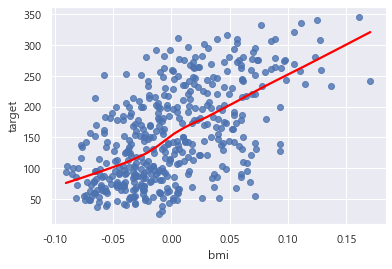

In [17]:
# 산점도 확인
# bmi - x, target = y
sns.regplot('bmi','target',lowess = True, line_kws={'color': 'red'}, data=df)

Text(0.5, 1.0, 'rate')

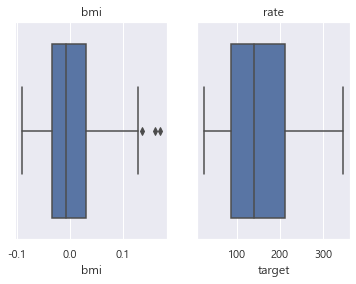

In [18]:
# 이상값 확인
fig, (ax1, ax2) = plt.subplots(1,2)

sns.boxplot('bmi',data = df, ax=ax1)
ax1.set_title('bmi')

# dist의 상자그림을 두번째(ax2)로 그린다
sns.boxplot('target', data=df, ax= ax2)
ax2.set_title('rate')

Text(0.5, 1.0, 'rate')

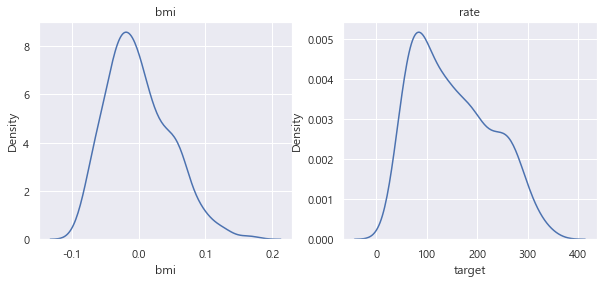

In [21]:
# 분포 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

sns.kdeplot(df['bmi'],ax=ax1)
ax1.set_title('bmi')

sns.kdeplot(df['target'],ax=ax2)
ax2.set_title('rate')

In [22]:
# 비대칭 확인(왜도)
import scipy.stats

print(scipy.stats.skew(df['bmi']))
print(scipy.stats.skew(df['target']))

0.5961166556214373
0.43906639932477265


### 단순선형회귀 - sklearn

In [27]:
from sklearn.linear_model import LinearRegression

# 데이터셋 생성
X = df.bmi.values
y = df.target.values

# 1차원데이터라서 2차원 데이터로 변환
l_train_X1 = X.reshape(-1,1)
l_test_y1 = y.reshape(-1,1)

print(X.shape)
print(l_train_X1.shape)

(442,)
(442, 1)


In [29]:
# 모델 학습
lr_model = LinearRegression()
lr_model.fit(l_train_X1, l_test_y1)

LinearRegression()

In [30]:
# 회귀계수 확인
print(lr_model.coef_[0])
print(lr_model.intercept_)

[949.43526038]
[152.13348416]


In [31]:
# 선형회귀 모델로 값 예측
lr_model.predict([[-2],[-1],[0],[1],[2]])

array([[-1746.73703661],
       [ -797.30177622],
       [  152.13348416],
       [ 1101.56874455],
       [ 2051.00400493]])

In [33]:
# 잔차 계산
lr_prediction = lr_model.predict(l_train_X1)
lr_residuals = l_test_y1 - lr_prediction
print(lr_residuals)

[[-5.97100381e+01]
 [-2.82621954e+01]
 [-5.33370335e+01]
 [ 6.48752315e+01]
 [ 1.74114256e+01]
 [-1.64953233e+01]
 [ 3.06445534e+01]
 [-8.73345836e+01]
 [-1.00710038e+02]
 [ 1.20779530e+02]
 [ 2.84371882e+01]
 [-9.97542138e+01]
 [ 5.42482360e+01]
 [ 3.46654164e+01]
 [-9.82170232e+00]
 [ 3.60151082e+01]
 [-2.62904079e+01]
 [-1.96376499e+01]
 [-4.51480813e+01]
 [ 3.30151082e+01]
 [-3.01456315e+01]
 [-8.18916407e+01]
 [-8.02879581e+01]
 [ 3.53132747e+01]
 [-2.15053118e+00]
 [ 6.18985442e+01]
 [ 5.82973115e+01]
 [-1.23663412e+02]
 [-9.14953464e-01]
 [ 1.36758668e+02]
 [-6.53370335e+01]
 [-3.09591292e+01]
 [ 6.99145075e+01]
 [-1.72855082e+01]
 [-2.70057548e+01]
 [-2.07051384e+01]
 [ 9.11292223e+01]
 [ 1.13385663e+02]
 [ 3.20801469e+01]
 [-7.56842754e+01]
 [-4.41947069e+01]
 [-3.29125036e+01]
 [-8.11480813e+01]
 [-3.78683279e+01]
 [ 4.21500852e+01]
 [-6.56118872e+01]
 [ 4.88752315e+01]
 [ 5.92040603e+01]
 [-3.74720105e+01]
 [-2.36842754e+01]
 [ 9.78198030e+00]
 [ 5.72690990e+01]
 [-8.4171394

In [36]:
# r squared 계산
SSE = (lr_residuals**2).sum()
SST = ((l_test_y1 - l_test_y1.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared: ', R_squared) #0.34만큼 설명해주고 있다

R_squared:  0.3439237602253803


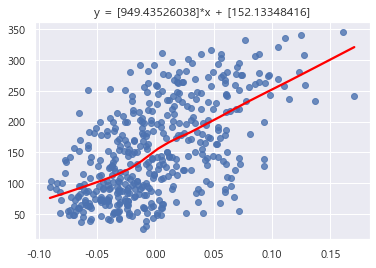

In [37]:
# 단순회귀모델 시각화
sns.regplot(l_train_X1, l_test_y1, lowess=True, line_kws={'color':'red'}, data= df)
plt.title('y = {}*x + {}'.format(lr_model.coef_[0], lr_model.intercept_))
plt.show()

### 단순선형회귀 통계적 분석

In [38]:
from statsmodels.formula.api import ols
res_sr = ols('target ~ bmi', data=df).fit() #종속변수:target, 독립변수:bmi

In [39]:
# 결과 확인
res_sr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           3.47e-42
Time:                        11:09:31   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.974     51.162      0.000     146.289     157.978
bmi          949.4353     62.515     15.187      0.000     826.570    1072.301
==============================================================================
Omnibus:                       11.674   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.310
Skew:                           0.156   Prob(JB):                       0.0259
Kurtosis:                       2.453   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 첫번째 표
- DF Model(독립변수 개수): 1
- No. Observations(표본수): 442
- Df Residuals(잔차의 자유도: 표본수 - 종속변수개수 - 독립변수개수): 440
- R-squared: 0.344(1에 가까울수록 좋음)
- Adj. R-squared(조정된 결정계수): 0.342
- F-statistic: 230.7(0에 가까울수록 적절)
- Prob (F-statistic):	3.47e-42 (0.5이하일수록 회귀계수는 0이 아니다 > 유의미함)

- F통계량에서? H0: 회귀계수는 0이다. H1: 회귀계수는 0이 아니다.

## 두번째 표
- Coef(데이터로부터 얻은 회귀계수 추정치): target = bmi X 949.4353 + 152.1335
- std err(계수 추정치의 표준오차, 작을수록 좋음)
- t(t-test, 독립변수와 종속변수 사이의 상관관계)
- P>|t|(독립변수의 유의확률: 현재와 같은 크기의 표본에서 이러한 계수가 추정될 확률인 p값, 0.05보다 작을수록 좋음)
- P > |t| < 0.05  -> 유의미함

## 결과 요약
### - 모델 적합도
- target에 대하여 bmi로 예측하는 회귀분석을 실시한 결과, 회귀모델이 통계적으로 유의미함.
- F(1,440) = 230.7 , P < 0.05

### - 독립변수
- BMI 의 회귀계수는 949.4353으로, target에 대하여 유의미한 예측 변인인 것으로 나타났다.
- t(440) = 15.187, P < 0.05

## 2. 다중회귀분석

In [41]:
# 데이터 탐색
print(df.shape)
df.head(3)

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


In [42]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


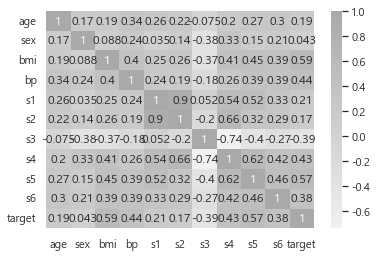

In [43]:
cmap = sns.light_palette("darkgray", as_cmap =True)
sns.heatmap(df.corr(), annot=True, cmap = cmap)
plt.show()